In [190]:
# Back Projection Demo
#  Compute sinusoid of image and reconstruct image
# Manuel Serna-Aguilera

In [191]:
import cv2 # to convert to grayscale
import matplotlib.pyplot as plt
from matplotlib import transforms
import math
import numpy as np

In [192]:
# Read in image
img_name = 'rectangle.png'
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

shape: (255, 255)


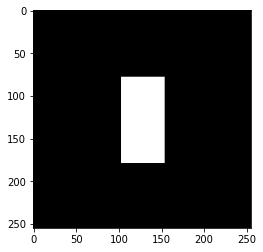

In [193]:
# Image info
height = img.shape[0]
width = img.shape[1]
print('shape: {}'.format(img.shape))
plt.imshow(img, cmap='gray')

In [194]:
# Delta to rotate image by (deg)
#delta = 0.5
delta = 1.0

In [195]:
# Plot rotated grayscale image
def rotate_and_plot(img, degrees):
    height = img.shape[0]
    width = img.shape[1]
    
    tr = transforms.Affine2D().rotate_deg(degrees) # rotate counter-clockwise
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray', extent=[-width, width, -height, height], transform=tr+ax.transData)

In [196]:
# Return rotated grayscale image (counter-clockwise)
# NOTE: image assumed to be grayscale
def rotate_img(img, degrees):
    rows,cols = img.shape
    
    # Rotate x-deg with respect to center of image
    M = cv2.getRotationMatrix2D((cols/2,rows/2), degrees, 1)
    rotated_img = cv2.warpAffine(img, M, (cols,rows))
    
    return rotated_img

In [197]:
#rotate_and_plot(img, delta)
#rotated = rotate_img(img, 45.0) # example: rotate by 45 deg
#plt.imshow(rotated, cmap='gray')

In [198]:
# Get sum of rows for all angles
''' OLD WAY
tot_angles = int(180/delta) # number of times to loop
S = np.zeros((tot_angles, height)) # matrix to store computations
angle_index = 0 # angle index for matrix S
current_angle = 0.0 # keeps track of current angle rotation in loop
rotated = img # progressively rotate image

while current_angle < 180.0:
    print('angle={}'.format(current_angle))
    
    # Rotate image by delta
    rotated = rotate_img(rotated, delta)
    
    # Take sum of rows for current rotated image
    for i in range(height):
        S[angle_index, i] = np.sum(rotated[i])
    
    # Update angle
    current_angle += delta
    angle_index += 1
#'''

#''' NEW WAY
tot_angles = int(180.0/delta) # number of times to loop
current_angle = 0.0 # keeps track of current rotation angle in loop
S = np.zeros((tot_angles, height)) # Sinusoid "image"
angle_index = 0 # angle index for matrix S

while current_angle < 180:
    #print('angle={}'.format(current_angle))
    
    # Rotate image
    rotated = rotate_img(img, current_angle)
    
    # Perform radon transform, store as 'angle_index'-th column in S
    #t = math.radians(current_angle)
    for i in range(height):
        S[angle_index, i] += np.sum (rotated[i])
        #fr j in range(width):
        #   # NOTE: loop body only diff!!!        
        #   #S[angle_index, i] += (rotated[i, j]*math.cos(t) + rotated[i, j]*math.sin(t))
    
    # Update angle
    current_angle += delta
    angle_index += 1


'''
max_angle = 
S = np.zeros((max_angle, height)) # matrix to store projections
theta = -90.0

for angle_index in range(max_angle):
    # Rotate image by delta
    rotated_img = rotate_img(img, theta)
    
    # Take sum of rows for current rotated image
    for i in range(height):
        S[angle_index, i] = np.sum(rotated_img[i])
    
    # Update rotation angle
    theta += delta
#'''

'\nmax_angle = \nS = np.zeros((max_angle, height)) # matrix to store projections\ntheta = -90.0\n\nfor angle_index in range(max_angle):\n    # Rotate image by delta\n    rotated_img = rotate_img(img, theta)\n    \n    # Take sum of rows for current rotated image\n    for i in range(height):\n        S[angle_index, i] = np.sum(rotated_img[i])\n    \n    # Update rotation angle\n    theta += delta\n#'

x-axis same as height of original image.


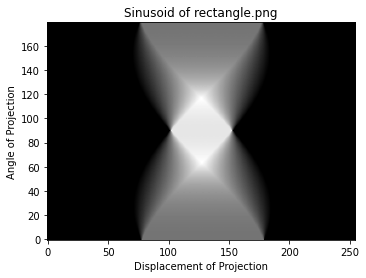

In [199]:
# Plot sinusoid image
#plt.imshow(S, cmap='gray')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Angle of Projection')
ax1.set_xlabel('Displacement of Projection')
ax1.set_title('Sinusoid of {}'.format(img_name))
ax1.imshow(S, cmap='gray', origin='lower')
print('x-axis same as height of original image.')

In [203]:
# Reconstruct image
''' OLD WAY
R = np.zeros((height, width)) # reconstructed image, call it R

tot_angles = int(180.0/delta)
angle_index = 0

for i in range(height):
    for j in range(width):
        for theta in range(tot_angles):
            R[i][j] += S[theta][j]
#'''

#''' NEW WAY
#height = img.shape[0]
#width = img.shape[1]
R = np.zeros((height, width)) # reconstructed image, call it R

#tot_angles = 180
#angle_index = 0

#for i in range(height):
#    for j in range(width):
#        for theta in range(tot_angles):
#            R[i][j] += S[theta][j]

tot_angles = int(180.0/delta) # number of times to loop
angle_index = 0

for i in range(height):
    for j in range(width):
        R[i][j] = np.sum(S[])
        #for t in range(tot_angles):
        #    R[i][j] += S[t][i]

#'''

IndexError: index 180 is out of bounds for axis 0 with size 180

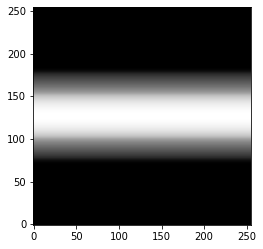

In [201]:
# TODO: plot reconstructed image
plt.imshow(R, cmap='gray', origin='lower')